# PANDAS BASE I: PRIMEROS PASOS Y ESTRUCTURAS DE DATOS

## POR QUÉ PANDAS

Habrás visto que para hacer data science en Python hay que aprender diferentes tecnologías: Python, Numpy, Pandas, ...

El motivo es que unas están basadas en otras pero aportan lo que las otras no tienen. Por ejemplo:

* Python es la base, y aporta lo necesario desde el punto de vista de programación: bucles, funciones, etc. Pero no tiene una estructura de datos apropiada para trabajar analíticamente y de forma rápida con columnas de datos
* Numpy soluciona eso, aportando los arrays. Pero en Numpy todo el array tiene que ser del mismo tipo de datos, y en data science tenemos que manejar varios tipos de información mezclados
* Pandas soluciona eso, introduciendo una estructura de datos que sí es 100% apropiada para data science: el dataframe, que en el fondo es como una concatenación de columnas, pero que pueden ser de diferentes tipos

## ESTRUCTURAS DE DATOS

Pandas tiene 2 grandes estructuras de datos:

* Series: son como columnas
* Dataframes: son como tablas, aunque internamente son uniones de columnas

Muchos métodos existen para ambas pero otros son propios de cada estructura, por tanto en cada momento es útil ser consciente de con qué estamos trabajando.

Hay otro elemento de la estructura de Pandas que es muy importante, tanto en Series como en Dataframes, es el índice (index).

El index como tal nos da el índice de las filas, pero también está columns, que es el índice de las columnas y también es un objeto index.

En este módulo vamos a aprender sobre las Series y los DataFrames y cómo crearlos a partir de otras estructuras que ya conocemos como listas, arrays o diccionarios.

## INSTALACIÓN

conda install pandas

## IMPORTACIÓN

In [2]:
import pandas as pd

## CONFIGURACIÓN

Para que el autocompletar funcione más rápido:

In [2]:
%config IPCompleter.greedy=True

Documentación de Pandas
https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Datos para los ejemplos:

In [12]:
# datos = '../../../00_DATASETS/DataSetKivaCreditScoring.csv' Esta ruta es del prof.
datos = './DataSetKivaCreditScoring.csv'

Registros a mostrar por defecto:

pd.options.display.min_rows: por defecto es 10 (5 superiores y 5 inferiores). Pero le podemos poner lo que queramos

In [15]:
# Vemos el valor por defecto, pero podemos indicar el numero
pd.options.display.min_rows = 6

In [14]:
pd.read_csv(datos, sep=';')

id           Funded Date  Funded Amount Country Country Code  \
0       84  2005-03-31T06:27:55Z            500  Uganda           UG   
1       85  2005-03-31T06:27:55Z            500  Uganda           UG   
2       86  2005-03-31T06:27:55Z            500  Uganda           UG   
...    ...                   ...            ...     ...          ...   
5143  5257  2007-06-02T03:57:56Z           1000   Ghana           GH   
5144  5258  2007-03-24T06:01:16Z           1100   Ghana           GH   
5145  5259  2007-06-05T04:56:45Z            800   Ghana           GH   

      Loan Amount             Paid Date  Paid Amount               Activity  \
0             500  2005-12-13T12:00:40Z        500.0           Butcher Shop   
1             500  2005-12-13T12:04:33Z        500.0  Food Production/Sales   
2             500  2005-12-13T12:06:56Z        500.0           Animal Sales   
...           ...                   ...          ...                    ...   
5143         1000  2008-03-13T10:01:32Z       1000.0           Construction   
5144         1100  2007-12-26T10:15:55Z       1100.0           Construction   
5145          800  2008-03-13T10:01:33Z        800.0            Food Market   

            Sector  Delinquent      Name  \
0             Food       False   Justine   
1             Food       False  Geoffrey   
2      Agriculture       False    Apollo   
...            ...         ...       ...   
5143  Construction       False      Abla   
5144  Construction       False     Manaa   
5145          Food       False    Beauty   

                                                    Use Status  
0                        Buy bulls, open a butcher shop   paid  
1      Buying more produce each time for greater profit   paid  
2     Increase number of goats bought and sold each ...   paid  
...                                                 ...    ...  
5143                                    Working capital   paid  
5144                                    Working capital   paid  
5145                                    Working capital   paid  

[5146 rows x 14 columns]

In [16]:
# Lo cambiamos por ej a 6
pd.options.display.min_rows = 6

In [17]:
# Comprobamos
pd.read_csv(datos, sep=';')

id           Funded Date  Funded Amount Country Country Code  \
0       84  2005-03-31T06:27:55Z            500  Uganda           UG   
1       85  2005-03-31T06:27:55Z            500  Uganda           UG   
2       86  2005-03-31T06:27:55Z            500  Uganda           UG   
...    ...                   ...            ...     ...          ...   
5143  5257  2007-06-02T03:57:56Z           1000   Ghana           GH   
5144  5258  2007-03-24T06:01:16Z           1100   Ghana           GH   
5145  5259  2007-06-05T04:56:45Z            800   Ghana           GH   

      Loan Amount             Paid Date  Paid Amount               Activity  \
0             500  2005-12-13T12:00:40Z        500.0           Butcher Shop   
1             500  2005-12-13T12:04:33Z        500.0  Food Production/Sales   
2             500  2005-12-13T12:06:56Z        500.0           Animal Sales   
...           ...                   ...          ...                    ...   
5143         1000  2008-03-13T10:01:32Z       1000.0           Construction   
5144         1100  2007-12-26T10:15:55Z       1100.0           Construction   
5145          800  2008-03-13T10:01:33Z        800.0            Food Market   

            Sector  Delinquent      Name  \
0             Food       False   Justine   
1             Food       False  Geoffrey   
2      Agriculture       False    Apollo   
...            ...         ...       ...   
5143  Construction       False      Abla   
5144  Construction       False     Manaa   
5145          Food       False    Beauty   

                                                    Use Status  
0                        Buy bulls, open a butcher shop   paid  
1      Buying more produce each time for greater profit   paid  
2     Increase number of goats bought and sold each ...   paid  
...                                                 ...    ...  
5143                                    Working capital   paid  
5144                                    Working capital   paid  
5145                                    Working capital   paid  

[5146 rows x 14 columns]

## ESTRUCTURA DE SERIES Y DATAFRAMES

Antes de continuar vamos a entender las principales partes de estas estructuras de datos.

Vamos a comenzar con una serie.

### Estructura de un Series

In [8]:
#Extraemos Funded Amount como Series

In [18]:
df = pd.read_csv(datos, sep=';')

In [19]:
df

id           Funded Date  Funded Amount Country Country Code  \
0       84  2005-03-31T06:27:55Z            500  Uganda           UG   
1       85  2005-03-31T06:27:55Z            500  Uganda           UG   
2       86  2005-03-31T06:27:55Z            500  Uganda           UG   
...    ...                   ...            ...     ...          ...   
5143  5257  2007-06-02T03:57:56Z           1000   Ghana           GH   
5144  5258  2007-03-24T06:01:16Z           1100   Ghana           GH   
5145  5259  2007-06-05T04:56:45Z            800   Ghana           GH   

      Loan Amount             Paid Date  Paid Amount               Activity  \
0             500  2005-12-13T12:00:40Z        500.0           Butcher Shop   
1             500  2005-12-13T12:04:33Z        500.0  Food Production/Sales   
2             500  2005-12-13T12:06:56Z        500.0           Animal Sales   
...           ...                   ...          ...                    ...   
5143         1000  2008-03-13T10:01:32Z       1000.0           Construction   
5144         1100  2007-12-26T10:15:55Z       1100.0           Construction   
5145          800  2008-03-13T10:01:33Z        800.0            Food Market   

            Sector  Delinquent      Name  \
0             Food       False   Justine   
1             Food       False  Geoffrey   
2      Agriculture       False    Apollo   
...            ...         ...       ...   
5143  Construction       False      Abla   
5144  Construction       False     Manaa   
5145          Food       False    Beauty   

                                                    Use Status  
0                        Buy bulls, open a butcher shop   paid  
1      Buying more produce each time for greater profit   paid  
2     Increase number of goats bought and sold each ...   paid  
...                                                 ...    ...  
5143                                    Working capital   paid  
5144                                    Working capital   paid  
5145                                    Working capital   paid  

[5146 rows x 14 columns]

In [21]:
df['Funded Amount']

0        500
1        500
2        500
        ... 
5143    1000
5144    1100
5145     800
Name: Funded Amount, Length: 5146, dtype: int64

Analizamos sus componentes

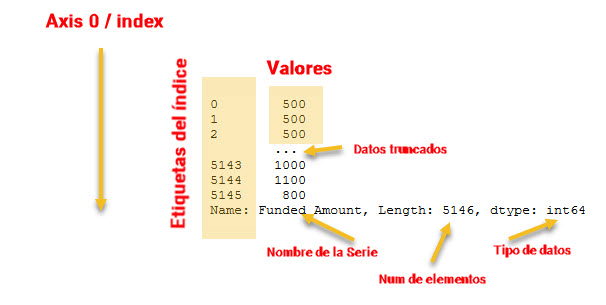

### Estructura de un DataFrame

In [11]:
#Visualizamos el dataframe
df

id           Funded Date  Funded Amount Country Country Code  \
0       84  2005-03-31T06:27:55Z            500  Uganda           UG   
1       85  2005-03-31T06:27:55Z            500  Uganda           UG   
2       86  2005-03-31T06:27:55Z            500  Uganda           UG   
...    ...                   ...            ...     ...          ...   
5143  5257  2007-06-02T03:57:56Z           1000   Ghana           GH   
5144  5258  2007-03-24T06:01:16Z           1100   Ghana           GH   
5145  5259  2007-06-05T04:56:45Z            800   Ghana           GH   

      Loan Amount             Paid Date  Paid Amount               Activity  \
0             500  2005-12-13T12:00:40Z        500.0           Butcher Shop   
1             500  2005-12-13T12:04:33Z        500.0  Food Production/Sales   
2             500  2005-12-13T12:06:56Z        500.0           Animal Sales   
...           ...                   ...          ...                    ...   
5143         1000  2008-03-13T10:01:32Z       1000.0           Construction   
5144         1100  2007-12-26T10:15:55Z       1100.0           Construction   
5145          800  2008-03-13T10:01:33Z        800.0            Food Market   

            Sector  Delinquent      Name  \
0             Food       False   Justine   
1             Food       False  Geoffrey   
2      Agriculture       False    Apollo   
...            ...         ...       ...   
5143  Construction       False      Abla   
5144  Construction       False     Manaa   
5145          Food       False    Beauty   

                                                    Use Status  
0                        Buy bulls, open a butcher shop   paid  
1      Buying more produce each time for greater profit   paid  
2     Increase number of goats bought and sold each ...   paid  
...                                                 ...    ...  
5143                                    Working capital   paid  
5144                                    Working capital   paid  
5145                                    Working capital   paid  

[5146 rows x 14 columns]

Analizamos sus componentes

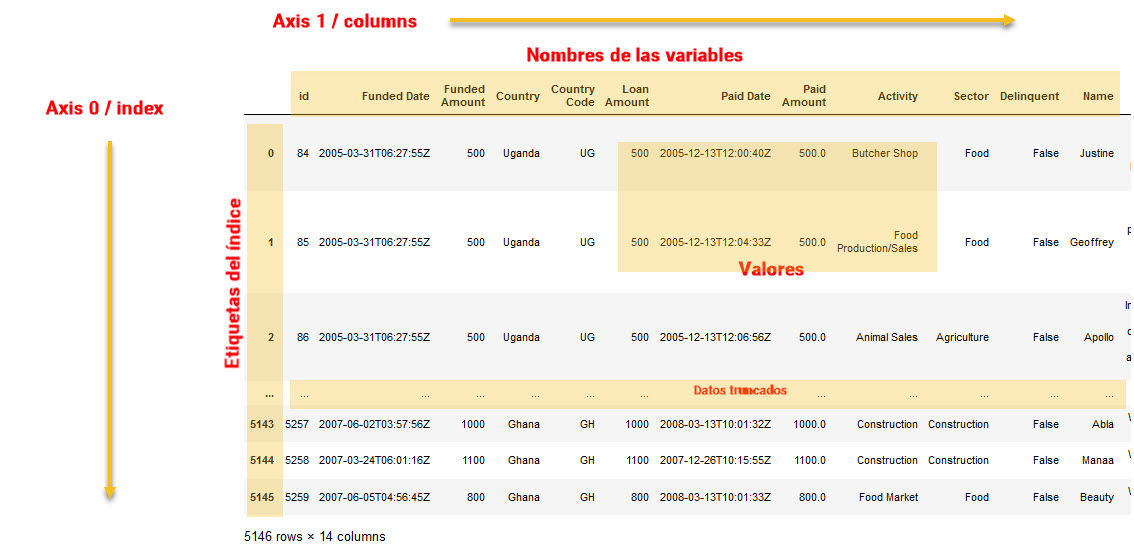

## TIPOS DE DATOS

Los tipos de datos son una de las cosas que más confunden al principio.

El motivo es que en la misma sesión de trabajo podemos estar usando Python base, Numpy, Pandas u otros paquetes de forma indistinta.

Pero realmente cada uno de ellos tiene su tipo de datos, que es clave para lo que podemos hacer y lo que no.

Para más complejidad los tipos de un paquete pueden estar construidos sobre los de otro.

Por ejemplo en Pandas el index, columns e incluso los propios datos son arrays multidimensionales de Numpy.

Pero luego el paquete puede aportar sus propios tipos.

Por ejemplo Pandas tiene tipos propios como category o Int64.

Con el uso será algo que automatices y ni siquiera pienses en ello.

Pero al principio es muy importante recordar que en Python todo son objetos, y que los métodos que podemos usar en cada  objeto, o su comportamiento esperado dependen de qué tipo de objeto es.

Por lo que si algo no funciona como esperas empieza siempre por preguntarte qué tipo de objeto o datos es el que estás manejando.

### Tipos de datos en Pandas

Pandas puede usar los siguientes tipos de datos:

* float: es el float de Numpy, que soporta datos nulos
* int: es el int de Numpy, que NO soporta datos nulos
* Int64: es un int que introduce Pandas para soportar datos nulos
* object: es el object de Numpy, que se usa como texto para meter cualquier cosa
* category: es un tipo que introduce Pandas específicamente para variables categóricas
* bool: es el booleano de Numpy, que NO soporta datos nulos
* boolean: es el booleano que introduce Pandas para soportar datos nulos
* datetime64: es el tipo de Numpy para las fechas, que NO soporta datos nulos

### Consideraciones adicionales

Además verás que detrás de los tipos de datos numéricos aparece un número, que por defecto Pandas le pone un 64.

Eso es porque Pandas importa cualquier dato numérico como un dato de 64 bits, aunque realmente necesitara menos bits para almacenar la info.

Es una cosa avanzada que sólo debería preocuparte si vas a usar millones de datos y empiezas a tener problemas de memoria. Por ahora simplemente que no te asuste el número.

Como referencia:

* int8 puede almacenar enteros desde -128 hasta 127
* int16 puede almacenar enteros desde -32768 hasta 32767
* int64 puede almacenar enteros desde -9223372036854775808 hasta 9223372036854775807

De igual forma, si alguna variable por ejemplo númerica pero que tenga algún nulo, Pandas la importará como object ya que como veíamos arriba los tipos de Numpy no admiten nulos. Aprenderemos a corregirlo en la lección de calidad de datos.

In [12]:
#Veamos los tipos de df ahora que sabemos interpretarlos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5146 entries, 0 to 5145
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5146 non-null   int64  
 1   Funded Date    5050 non-null   object 
 2   Funded Amount  5146 non-null   int64  
 3   Country        5146 non-null   object 
 4   Country Code   5146 non-null   object 
 5   Loan Amount    5146 non-null   int64  
 6   Paid Date      4121 non-null   object 
 7   Paid Amount    4072 non-null   float64
 8   Activity       5146 non-null   object 
 9   Sector         5146 non-null   object 
 10  Delinquent     5146 non-null   bool   
 11  Name           5145 non-null   object 
 12  Use            5145 non-null   object 
 13  Status         5098 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(9)
memory usage: 527.8+ KB


## CREAR DATOS

### Crear un Series

#### Crear una serie a patir de una lista

In [11]:
#A partir de una lista
serie1 = pd.Series(['a','b','c'])
serie1

0    a
1    b
2    c
dtype: object

Vemos cómo ha creado automáticamente el índice con un secuencial. Podemos extraer cada componente con .index y .values

Notar también que el índice empieza en cero.

In [12]:
serie1.index

RangeIndex(start=0, stop=3, step=1)

In [13]:
serie1.values

array(['a', 'b', 'c'], dtype=object)

Podemos definir un índice personalizado con el parámetro index.

In [14]:
indice = ['10','20','30']
valores = ['a','b','c']
serie1 = pd.Series(valores, index = indice)
serie1

10    a
20    b
30    c
dtype: object

#### Crear una serie a partir de un diccionario

In [5]:
# A partir de un diccionario
dict1 = {'a': 1, 'b': 2, 'c': 3}
serie3 = pd.Series(dict1)
serie3

a    1
b    2
c    3
dtype: int64

En este caso vemos cómo el índice se ha creado a partir de las claves, y los valores a partir del los valores del diccionario.

#### Crear una serie a partir de un array de numpy

In [3]:
# A partir de un array de numpy
import numpy as np
vector1 = np.array([1, 2, 3])
serie2 = pd.Series(vector1)
serie2

0    1
1    2
2    3
dtype: int32

Podemos volver a pasar de Series a array de dos formas:

* .values: funciona, pero en la documentación desaconsejan este método
* .to_numpy()

In [17]:
#con .values
type(serie2.values)

numpy.ndarray

In [18]:
#con .to_numpy()
type(serie2.to_numpy())

numpy.ndarray

#### Pasar una serie a un dataframe

Con el método .to_frame()

In [19]:
#Vemos la salida de serie2 como la serie que es
serie2

0    1
1    2
2    3
dtype: int32

In [20]:
#Vemos la salida de serie2 al pasarla a dataframe
serie2.to_frame()

0
0  1
1  2
2  3

### Indexando una serie

Hay dos formas de indexar:

* Por posición: pasándole la posición en el índice del elemento que queremos
* Por nombre: pasándole el nombre del índice del elemento que queremos

In [6]:
serie3

a    1
b    2
c    3
dtype: int64

In [21]:
#Por posición
serie3[0]

1

In [22]:
#Por nombre
serie3['a']

1

### Atributos de una serie

Los atributos son propiedades de los objetos. Al contrario que los métodos no llevan ()

In [23]:
#Tipo de datos
serie2.dtype

dtype('int32')

In [26]:
#Longitud del vector (número de elementos)
serie2.size

3

**Documentación**

Lista de atributos y métodos de una Serie: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

### Crear un dataframe

**Documentación**

Lista de atributos y métodos de un DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

#### Crear un dataframe a partir de un diccionario

En esta estructura cada clave del diccionario será una columna y cada valor será una lista con todas las futuras filas de esa columna

In [7]:
dicc_para_df = {'letras': ['a', 'b', 'c'], 'numeros': [1, 2, 3]}
dicc_df = pd.DataFrame(dicc_para_df)
dicc_df

letras  numeros
0      a        1
1      b        2
2      c        3

Para un índice personalizado usamos index

In [8]:
dicc_para_df = {'letras': ['a', 'b', 'c'], 'numeros': [1, 2, 3]}
dicc_df = pd.DataFrame(dicc_para_df, index=[10, 20, 30])
dicc_df

letras  numeros
10      a        1
20      b        2
30      c        3

#### Crear un dataframe a partir de listas con sus componentes

Al final un dataframe necesita datos, nombres de columnas y un índice.

Por eso el método DataFrame trae justo esos parámetros para que podamos pasarle listas con la info necesaria.

Notar que en este caso los datos se los pasamos como filas, no como columnas

In [9]:
datos_para_df = [['a', 1], ['b', 2], ['c', 3]]
columnas_para_df = ['letras', 'numeros']
indice_para_df = [10, 20, 30]

dicc_df = pd.DataFrame(
    data=datos_para_df, columns=columnas_para_df, index=indice_para_df)
dicc_df

letras  numeros
10      a        1
20      b        2
30      c        3

#### Crear un dataframe a partir de un array de dos dimensiones

In [10]:
vector_2d = np.array([[1, 2, 3], ['a', 'b', 'c']])
df_2d = pd.DataFrame(vector_2d)
df_2d

0  1  2
0  1  2  3
1  a  b  c

Notar cómo no tiene nombres de índice ni de columnas, ya que todos los valores del array lo coje como datos.

Le podemos poner los valores del índice con index y los de las columnas con columns.

In [11]:
vector_2d = np.array([[1, 2, 3], ['a', 'b', 'c']])
pd.DataFrame(vector_2d, index=['fila1', 'fila2'],
             columns=['col1', 'col2', 'col3'])

col1 col2 col3
fila1    1    2    3
fila2    a    b    c

Podemos volver a pasar de dataframe a array de dos formas:

* .values: funciona, pero en la documentación desaconsejan este método
* .to_numpy()

In [29]:
#con .values
type(df_2d.values)

numpy.ndarray

In [30]:
#con .to_numpy()
type(df_2d.to_numpy())

numpy.ndarray

#### De DataFrame a Series

Como sabemos un dataframe es una colección de Series. Hay varios métodos para extraer las columnas de un dataframe.

Pero es importante saber lo que devuelve cada uno. Especialmente la de doble corchetes ya que en muchos casos nos resultará más fácil trabajar en formato DataFrame aunque sea sólo una variable.

In [12]:
# Podemos extraer con la notación de punto, y devuelve un Series
# Creamos el dataframe
vector_2d = np.array([[1, 2, 3], ['a', 'b', 'c']])
df_2d = pd.DataFrame(vector_2d, index=['fila1', 'fila2'], columns=[
                     'col1', 'col2', 'col3'])
# Extraemos con punto
print(type(df_2d.col1))
df_2d.col1

<class 'pandas.core.series.Series'>


fila1    1
fila2    a
Name: col1, dtype: object

In [13]:
df_2d

col1 col2 col3
fila1    1    2    3
fila2    a    b    c

In [33]:
#Podemos extraer con la notación de corchetes, y devuelve un Series
print(type(df_2d['col1']))
df_2d['col1']

<class 'pandas.core.series.Series'>


fila1    1
fila2    a
Name: col1, dtype: object

In [34]:
#Pero si extraemos con la notación de dobles corchetes devuelve un DataFrame
print(type(df_2d[['col1']]))
df_2d[['col1']]

<class 'pandas.core.frame.DataFrame'>


col1
fila1    1
fila2    a